# 타이타닉 실습 01
- 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델 생성

### contents
1. 데이터셋 확인
- null data check
- target label 확인

2. Exploratory data analysis


In [1]:
# 필요 패키지 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # 다른 스타일도 사용가능, 여기서는 'seaborn'스타일 사용
sns.set(font_scale = 2.5) # 일일이 font size 를 지정할 필요없이 seaborn의 font_scale을 사용하겠다.

# 데이터셋에 채워지지 않은 null 데이터를 쉽게 찾아주는 패키지
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#노트북에서 바로바로 시각화 가능

1. 데이터셋 확인
- null data 확인하고 수정

2. 탐색적 데이터 분석
- 여러 feature 개별 분석
- feature 간 상관관계 확인
- 시각화를 통한 insight 도출

3. feature engineering
- 모델 성능을 높일 수 있도록 feature engineering
- one-hot encoding / class로 나누기 / 구간으로 나누기/ 텍스트 데이터 처리 등

4. model 생성
- sklearn
- 딥러닝을 위해 tensorflow/pythorch 등 사용

5. model 학습 및 예측
- trainset 을 가지고 모델 학습 후, testset을 가지고 예측

6. model 평가
- 예측 성능이 원하는 수준인지 판단

### 01. Dataset 확인

In [6]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null data check

In [14]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [15]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


- Train, Test 데이터셋 모두 Age(약 20%), Cabin(약 80%), Train 데이터셋의 Embarked(0.22%)Null data가 존재한다

<AxesSubplot:>

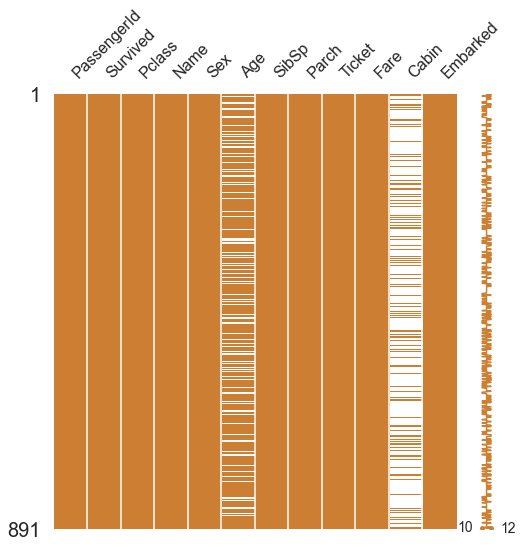

In [18]:
# MSNO라이브러리를 사용하면 null data 의 존재를 더 쉽게 볼 수 있다. 
msno.matrix(df = df_train.iloc[:,:], figsize =(8,8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

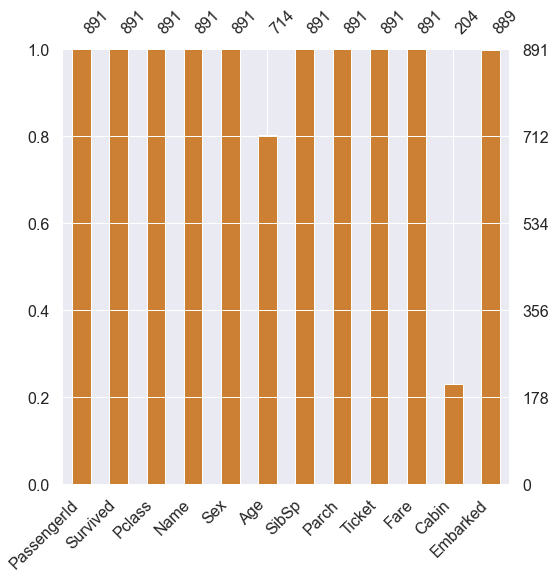

In [19]:
msno.bar(df=df_train.iloc[:,:], figsize = (8,8) ,color = (0.8, 0.5, 0.2))

<AxesSubplot:>

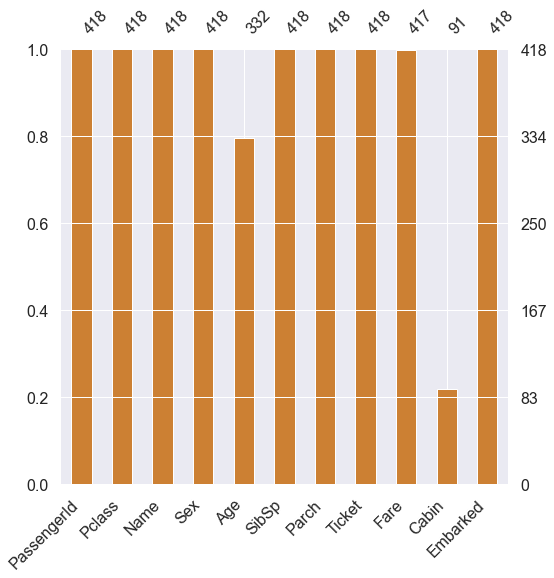

In [20]:
msno.bar(df=df_test.iloc[:,:], figsize = (8,8) ,color = (0.8, 0.5, 0.2))

### Target label 확인
- target label 이 어떤 distribution 을 가지고 있는 지 확인해야 한다.
- 지금과 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다

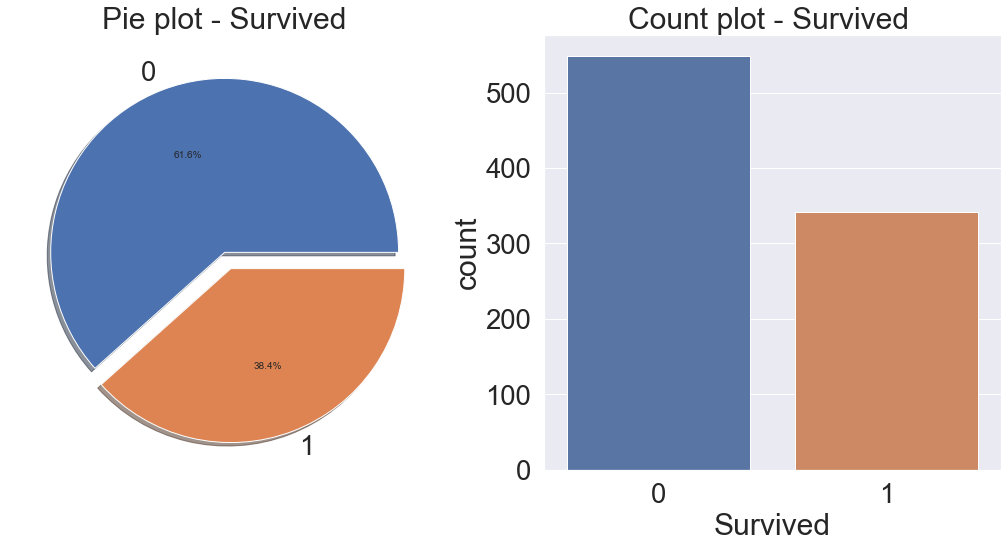

In [27]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                             autopct = '%1.1f%%',
                                             ax = ax[0],
                                             shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train , ax = ax[1])
ax[1].set_title('Count plot - Survived ')

plt.show()

- 사망자: 61.6% , 생존자: 38.4%
- target label 의 분포가 균일한 편

### Exploratory Data Analysis
- 시각화를 통한 insight 도출

#### Pclass
- 티켓의 클래스
- 1 = 1st , 2 = 2st , 3 = 3st로 나뉨
- 순서가 있는 데이터 
- Pclass 에 따른 생존률(survived = 1) 차이를 살펴본다 

In [29]:
# count() 를 하면 각 class에 몇명이 있었는지 확인가능
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [30]:
# sum() 를 하면 각 class 에 생존자가 몇명 있었는지 확인 가능
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas의 crosstab을 사용하면 위 과정을 좀 더 쉽게 볼 수 있다.

In [34]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')
# margin = True 를 주면 열, 행 합계(All)를 제시해준다

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스 별 생존률을 얻을 수 있다. 
- ex) 136(생존자) / 80(사망자) + 136(생존자) = 0.629

<AxesSubplot:xlabel='Pclass'>

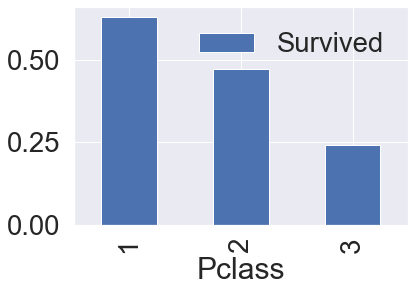

In [39]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'] , as_index = True).mean().sort_values(by = 'Survived' , ascending = False).plot.bar()

- Pclass 가 높을수록(1st) 생존률이 높다 

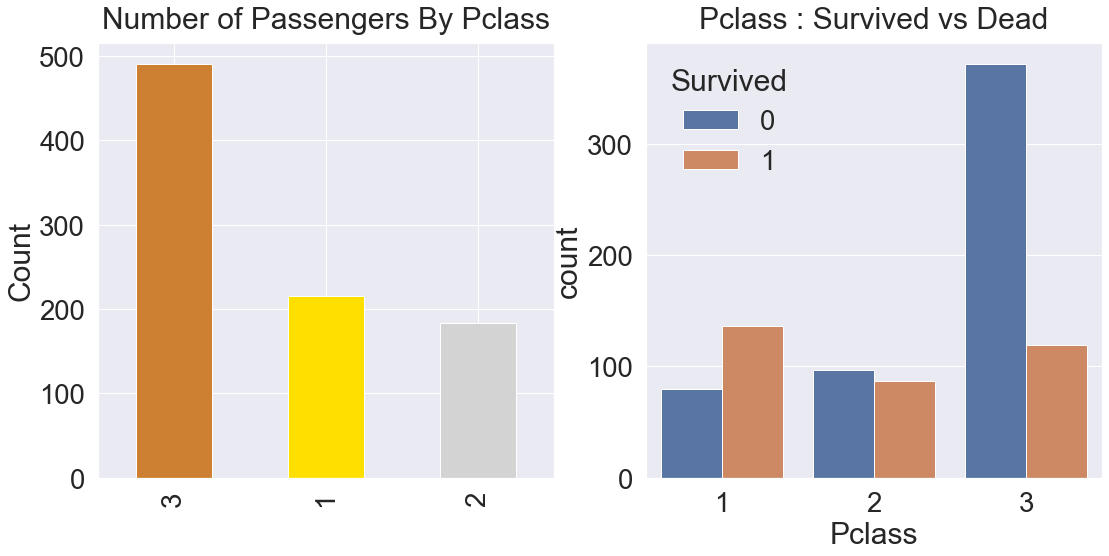

In [44]:
y_position = 1.02
# 타이틀이 위치 상수값
f, ax = plt.subplots(1,2,figsize=(18, 8))

# ax[0]은 왼쪽 그래프, ax[1] 는 오른쪽 그래프
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],
                                           ax = ax[0])
ax[0].set_title("Number of Passengers By Pclass" , y = y_position)
ax[0].set_ylabel('Count')

#ax[1] 오른쪽에 그래프를 그린다
sns.countplot('Pclass' , hue = 'Survived', data = df_train , ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

- 클래스가 높을 수록, 생존확률이 높다는 걸 확인할 수 있다.

insight => 생존에 'Pclass'가 큰 영향을 미친다고  생각할 수 있고, 모델을 세울 때 해당 Feature를 사용하는 것이 좋을 것 이라 판단할 수 있다.